<a href="https://colab.research.google.com/github/charlien12/ML-practice-project/blob/main/Test_preparation_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "exams.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/student-performance-in-mathematics",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3051306654.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 70.0k/70.0k [00:00<00:00, 2.12MB/s]

First 5 records:    gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  


In [2]:
for item in df.columns.tolist():
  display(df[item].value_counts())

,count
gender,
male,508
female,492


,count
race/ethnicity,
group C,323
group D,257
group B,198
group E,143
group A,79


,count
parental level of education,
some college,224
high school,215
associate's degree,204
some high school,177
bachelor's degree,105
master's degree,75


,count
lunch,
standard,660
free/reduced,340


,count
test preparation course,
none,656
completed,344


,count
math score,
62,32
74,30
59,29
67,29
68,28
...,...
27,1
25,1
21,1


,count
reading score,
72,36
77,35
66,34
68,32
69,30
...,...
25,1
30,1
32,1


,count
writing score,
78,32
72,32
70,31
74,31
63,29
...,...
35,1
28,1
27,1


In [3]:
display(df.isna().sum())
display(df.duplicated().sum())

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


np.int64(0)

In [6]:

categorical_cols=['gender','race/ethnicity','parental level of education','lunch','test preparation course']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for item in categorical_cols:
  df[item] = le.fit_transform(df[item])
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check Correlation

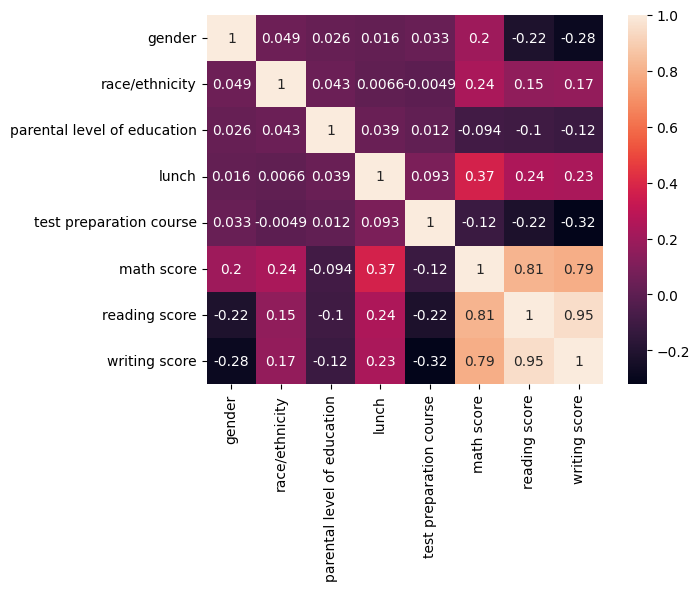

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Check Outliers

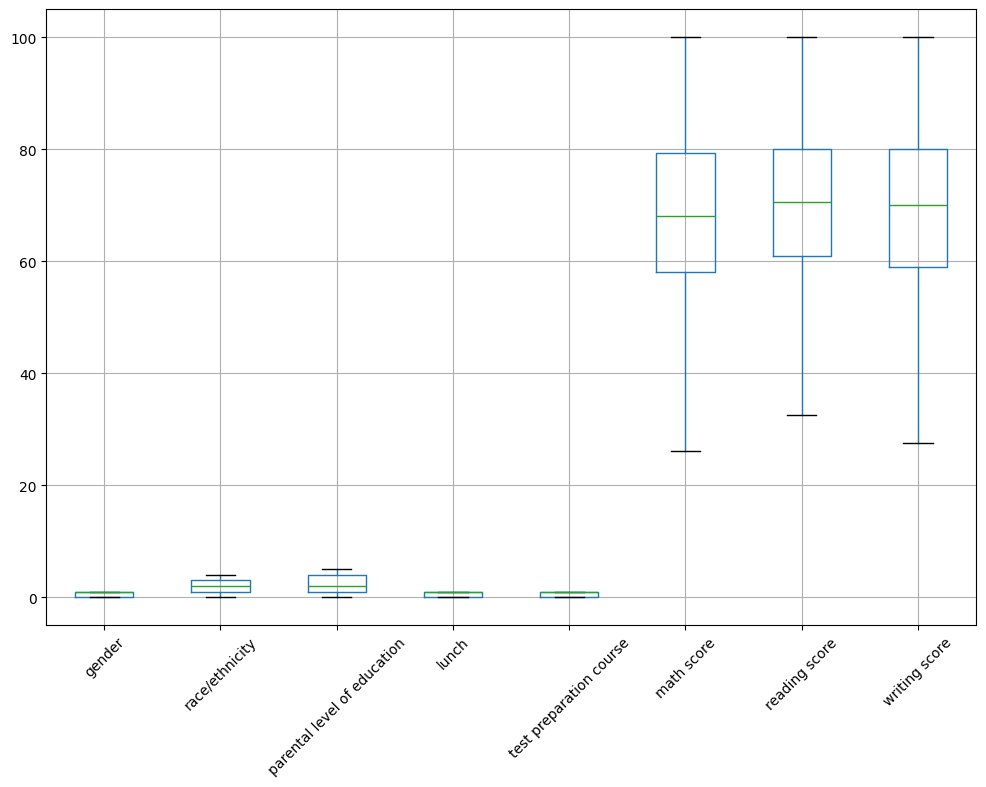

In [14]:
df.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

In [12]:
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df[col][outlier_mask]
    return outliers

int_cols = df.select_dtypes(include='int').columns.tolist()
outliers = detect_outliers_iqr(df, int_cols)

# Example to print outliers for each column
cols_with_outliers = [col for col, vals in outliers.items() if not vals.empty]
print(cols_with_outliers)

['math score', 'reading score', 'writing score']


In [13]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

df_capped = cap_outliers_iqr(df, cols_with_outliers)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [19]:
model=LinearRegression()
X=df.drop('math score',axis=1)
y=df['math score']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled,Y_train)
y_pred=model.predict(X_test_scaled)
r2=r2_score(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
display("r2 score",r2)
display("mse",mse)
display("mae",mae)

'r2 score'

0.8819280652091709

'mse'

25.90088498187403

'mae'

4.201154744400709

In [20]:
import joblib
joblib.dump(model,'model.pkl')


['model.pkl']

## Project Summary

This project involved building a Linear Regression model to predict student math scores. The key steps and outcomes are summarized below:

### 1. Data Loading and Initial Exploration
*   The `exams.csv` dataset was loaded using `kagglehub.load_dataset`.
*   Initial checks confirmed no missing values or duplicates in the raw dataset.

### 2. Data Preprocessing
*   **Categorical Encoding**: Categorical features (`gender`, `race/ethnicity`, `parental level of education`, `lunch`, `test preparation course`) were transformed into numerical format using `LabelEncoder`.
*   **Outlier Handling**: Outliers in numerical score columns (`math score`, `reading score`, `writing score`) were identified using the IQR method and then capped to fall within the acceptable bounds.
*   **Data Type Validation**: Unit tests confirmed that all columns in the processed DataFrame (`df_capped`) are numeric, ensuring suitability for model training.

### 3. Exploratory Data Analysis (EDA)
*   A correlation heatmap was generated to visualize the relationships between features. Notably, 'reading score' and 'writing score' showed strong positive correlations with 'math score'.
*   Box plots were used to visually identify the distribution and potential outliers in the numerical columns before capping.

### 4. Model Training and Evaluation
*   The dataset was split into training and testing sets (80/20 ratio).
*   Features were scaled using `StandardScaler` to ensure uniform contribution during model training.
*   A `LinearRegression` model was trained on the scaled training data.
*   The model's performance was evaluated using:
    *   **R-squared (R2) score**: `0.8819`
    *   **Mean Squared Error (MSE)**: `25.90`
    *   **Mean Absolute Error (MAE)**: `4.20`
*   These metrics indicate a strong performance, with the model explaining a significant portion of the variance in math scores and having a relatively low average prediction error.

### 5. Model Persistence
*   The trained `LinearRegression` model was saved to a file named `model.pkl` using `joblib`, allowing for future use without retraining.

### 6. Unit Testing
*   A series of unit tests were performed on the processed `df_capped` DataFrame to ensure data quality and integrity:
    *   No missing values were found.
    *   All columns were confirmed to be numeric.
    *   Capped values in 'math score', 'reading score', and 'writing score' were verified to be within their respective IQR bounds.
    *   Categorical columns retained their expected unique value counts after encoding.
    *   'math score' was confirmed to be within the reasonable range of 0-100.

All unit tests passed successfully, confirming the robustness of the data preprocessing steps.

This comprehensive workflow demonstrates successful data preparation and model development for predicting student math performance.

## Unit Tests for the Processed Dataset

In [21]:
import numpy as np

# Test 1: Check for no missing values in df_capped
assert df_capped.isnull().sum().sum() == 0, "Test 1 Failed: Missing values found in df_capped after processing."
print("Test 1 Passed: No missing values found in df_capped.")

Test 1 Passed: No missing values found in df_capped.


In [26]:
import pandas as pd

# Test 2: Check data types of all columns
# All columns should ideally be numeric (int or float) after encoding and capping
for col in df_capped.columns:
    assert pd.api.types.is_numeric_dtype(df_capped[col]), f"Test 2 Failed: Column '{col}' is not numeric. Type: {df_capped[col].dtype}"
print("Test 2 Passed: All columns in df_capped are numeric.")

Test 2 Passed: All columns in df_capped are numeric.


In [23]:
# Test 3: Verify capped values are within bounds for 'math score', 'reading score', 'writing score'
# Recalculate IQR bounds to verify
for col in cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    assert (df_capped[col] >= lower_bound).all(), f"Test 3 Failed: Values in '{col}' are below lower bound."
    assert (df_capped[col] <= upper_bound).all(), f"Test 3 Failed: Values in '{col}' are above upper bound."
print(f"Test 3 Passed: Capped values in {cols_with_outliers} are within their respective IQR bounds.")

Test 3 Passed: Capped values in ['math score', 'reading score', 'writing score'] are within their respective IQR bounds.


In [24]:
# Test 4: Check unique values for categorical columns after Label Encoding
# Assuming original unique counts are known or can be re-derived from the original df before encoding
# For simplicity, let's check if the encoded columns still have a reasonable number of unique values
# (e.g., gender should have 2 unique values, race/ethnicity 5, etc.)
expected_unique_counts = {
    'gender': 2,
    'race/ethnicity': 5,
    'parental level of education': 6,
    'lunch': 2,
    'test preparation course': 2
}

for col, expected_count in expected_unique_counts.items():
    actual_count = df_capped[col].nunique()
    assert actual_count == expected_count, f"Test 4 Failed: Column '{col}' has {actual_count} unique values, expected {expected_count}."
print("Test 4 Passed: Categorical columns have expected unique value counts after encoding.")

Test 4 Passed: Categorical columns have expected unique value counts after encoding.


In [25]:
# Test 5: Check if 'math score' is within a reasonable range (0-100)
# After capping, scores should not exceed 100 or be less than 0 (unless lower bound was negative)
assert (df_capped['math score'] >= 0).all(), "Test 5 Failed: 'math score' contains values below 0."
assert (df_capped['math score'] <= 100).all(), "Test 5 Failed: 'math score' contains values above 100."
print("Test 5 Passed: 'math score' is within the 0-100 range.")

Test 5 Passed: 'math score' is within the 0-100 range.
